<a href="https://colab.research.google.com/github/ollihansen90/Mathe-SH/blob/main/Bruteforce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fragen?
Solltet ihr Fragen zum Code oder Probleme mit Colab haben, schickt uns gerne eine Mail:

*   h.hansen@uni-luebeck.de
*   mika.kohlhammer@student.uni-luebeck.de
*   friederike.meissner@student.uni-luebeck.de
*   dustin.haschke@student.uni-luebeck.de

# 🔐 Bruteforce: Wir knacken ein geheimes Passwort!

In diesem Notebook lernen wir, wie Computer ein geheimes Passwort erraten können, indem sie einfach **alle möglichen Kombinationen ausprobieren**.  
Diese Methode heißt **Bruteforce**.

Wir untersuchen:
- wie Bruteforce funktioniert,
- wie viele Möglichkeiten es gibt,
- wie lange der Computer für verschiedene Passwortlängen braucht.

## 💡 Idee

Stell dir vor, jemand hat ein geheimes Passwort gewählt.  
Es besteht nur aus **kleinen Buchstaben (a–z)** und **Ziffern (0–9)**.

Der Computer kennt das Passwort nicht.  
Er probiert einfach **alle möglichen Kombinationen** durch:
- "a"
- "b"
- ...
- "z"
- "0"
- "1"
- ...
- "99"
- ...

Bis das Passwort gefunden ist.

Wir programmieren das jetzt selbst!

## 🧩 Schritt 1: Unser Alphabet

Wir definieren zuerst, welche Zeichen ein Passwort enthalten kann.
In diesem Beispiel erlauben wir:

- 26 Kleinbuchstaben: a-z
- 10 Ziffern: 0-9

Insgesamt also **36 mögliche Zeichen**.



In [152]:
alphabet = "abcdefghijklmnopqrstuvwxyz0123456789"

print(len(alphabet))

36


## 🔑 Schritt 2: Ein geheimes Passwort erzeugen

Damit wir etwas zum Knacken haben, lässt der Computer zunächst ein **zufälliges Passwort** erstellen. Die Länge wollen wir hierbei selbst festlegen können.

In [150]:
import random

def random_passwort(laenge):
    passwort = ""
    return passwort

print(random_passwort(40))

## 🧨 Schritt 3: Bruteforce

Die Idee bei Bruteforce ist, dass man einfach **alle** möglichen Lösungen testet und dann die korrekte auswählt. Der Trick hierbei ist, dass man systematisch alle möglichen Lösungen generiert und dann mit dem Passwort vergleicht. Hierfür wollen wir die Wörter einfach **"hochzählen"**.

### 🔢 Wie zählt man ein Passwort hoch?

Stellen wir uns vor, unser Alphabet ist wie ein Zahlensystem.

Beispiele:
- Im **Dezimalsystem** zählen wir: 0 → 1 → 2 → … → 9 → 10  
- Im **Alphabet-System** zählen wir: a → b → c → … → z → 0 → 1 → … → 9 → wieder a (falls wir weiterzählen)

Das heißt: Wir behandeln jedes Passwort wie eine **Zahl in einer fremden Basis** (Basis = Anzahl der Zeichen im Alphabet).

#### Beispiel: "aa9" hochzählen
- Letzter Buchstabe 9 → es gibt kein nächstes Zeichen in unserem Alphabet  
- 9 wird zu a (*Übertrag*)  
- Der davor liegende Buchstabe a wird zu b  
- Ergebnis: **"aba"**

Das funktioniert genauso wie beim normalen Rechnen mit Übertrag.

#### Unsere Funktion `naechstes_wort(wort)`
Die Funktion macht genau dieses Hochzählen:

1. **Wandle jeden Buchstaben in eine Zahl um**  
   (a → 0, b → 1, …, 9 → 35)

2. **Erhöhe die letzte Stelle um 1**

3. **Falls eine Stelle „überläuft“** (z. B. von 35 auf 36),  
   setze sie auf 0 und erhöhe die Stelle links daneben.

4. **Baue das Wort wieder aus den Buchstaben zusammen**

Damit zählt der Computer das Passwort **systematisch** durch -
genauso wie man bei einer Uhr von 23:59 → 00:00 weiterzählt.


In [153]:
def naechstes_wort(wort):
    indexlist = [alphabet.find(b) for b in wort]
    # -----------------------------------------
    # Hier kommt die Lösung zum Hochzählen rein
    # -----------------------------------------
    if indexlist[0] == len(alphabet):
        indexlist[0] = 0
        indexlist = [0]+indexlist
    return "".join(alphabet[i] for i in indexlist)

wort = "hallo"
print(wort, "→", naechstes_wort(wort))
wort = "asdfeuinfa"
print(wort, "→", naechstes_wort(wort))
wort = "asdf999"
print(wort, "→", naechstes_wort(wort))
wort = "123456"
print(wort, "→", naechstes_wort(wort))
wort = "9999"
print(wort, "→", naechstes_wort(wort))

hallo → hallo
asdfeuinfa → asdfeuinfa
asdf999 → asdf999
123456 → 123456
9999 → 9999


## 🧨 Unser kompletter Passwort-Knacker

Jetzt setzen wir alles zu einem vollständigen Bruteforce-Programm zusammen.

Die Idee:
1. Wir beginnen bei einem Startwort, zum Beispiel `"aaaa"`.
2. Dann zählen wir das Wort immer weiter hoch:
   `"aaaa" → "aaab" → "aaac" → …`
3. Sobald das aktuelle Wort mit dem geheimen Passwort übereinstimmt, haben wir gewonnen.
4. Wir stoppen die Zeit, um zu sehen, wie lange der Bruteforce-Angriff gedauert hat.

### Wie funktioniert der Knacker?

Die Funktion `passwortknacker(geheim)` macht Folgendes:

- Sie beginnt mit dem kleinsten möglichen Wort, z. B. `"aaaa"` (gleiche Länge wie das geheime Passwort).  
- Sie wiederholt so lange:
  - **Nächstes Wort erzeugen**  
  - Prüfen: *Stimmt das Wort mit dem Geheimwort überein?*
- Sobald beide Wörter gleich sind, ist das Passwort gefunden.
- Am Ende wird angezeigt, wie viele Sekunden der Computer gebraucht hat.

Das zeigt sehr gut:
- Je länger das Passwort ist, desto mehr Kombinationen müssen ausprobiert werden.
- Die Laufzeit wächst **exponentiell**.


In [154]:
import time

def passwortknacker(geheim):
    wort = alphabet[0]*len(geheim)
    # ---------------------------------
    # Aufgabe: Knacke hier das Passwort (naechstes_wort)
    # ---------------------------------
    print("Das Passwort ist", wort)

geheim = random_passwort(5)

start = time.time()
passwortknacker(geheim)
print("Das Knacken hat", time.time()-start, "Sekunden gedauert.")


Das Passwort ist 
Das Knacken hat 0.0033113956451416016 Sekunden gedauert.


## 🔒 Warum lange Passwörter so wichtig sind

Mit unserem Bruteforce-Experiment haben wir gesehen:
Ein Computer probiert einfach **alle möglichen Kombinationen** aus, bis er das richtige Passwort findet. Wie lange das dauert, hängt nur von zwei Dingen ab:

1. **Wie viele Zeichen sind erlaubt?**  
   (z. B. nur Kleinbuchstaben, oder auch Großbuchstaben, Zahlen, Sonderzeichen)

2. **Wie lang ist das Passwort?**

Je mehr mögliche Zeichen und je länger das Passwort, desto schneller wächst die Zahl aller Kombinationen - und zwar **exponentiell**, also extrem schnell.

### Beispiel: Wie viele Passwörter sind möglich?

| Alphabet | Länge | Möglichkeiten |
|---------|-------|----------------|
| 26 Kleinbuchstaben | 5 | 26⁵ = 11,881,376 |
| 36 Zeichen (a-z, 0-9) | 6 | 36⁶ = 2,176,782,336 |
| 62 Zeichen (a-z, A-Z, 0-9) | 8 | 62⁸ ≈ 218 Billionen |
| 95 Zeichen (alle Tastaturzeichen) | 10 | 95¹⁰ ≈ 6.03 * 10¹⁹ |

Das zeigt: **Schon ein einziges zusätzliches Zeichen macht einen riesigen Unterschied.**

### Wie lange dauert ein Bruteforce-Angriff?

Nehmen wir an, ein Angreifer schafft ungefähr **1 Milliarde Versuche pro Sekunde (1 × 10⁹/s)** (das ist realistisch für moderne Grafikkarten).

| Passwort | Alphabetgröße | Suchraum | Bruteforce-Zeit |
|----------|----------------|----------|------------------|
| 5 Zeichen, a-z | 26 | 11.8 Mio | < 1 Sekunde |
| 6 Zeichen, a-z | 26 | 308 Mio | < 1 Sekunde |
| 8 Zeichen, a-z | 26 | 208 Milliarden | ~200 Sekunden |
| 8 Zeichen, a-z, A-Z, 0-9 | 62 | 218 Billionen | ~2.5 Tage |
| 10 Zeichen, komplettes Tastaturlayout | 95 | 6 × 10¹⁹ | ~2.000 Jahre |
| 12 Zeichen, komplettes Tastaturlayout | 95 | 5 × 10²³ | ~150.000.000 Jahre |

### Fazit

- Kurze Passwörter sind **immer** unsicher - egal welche Zeichen.
- Lange Passwörter sind zuverlässig sicher, selbst gegen sehr schnelle Rechner.
- Schon **12-14 Zeichen** mit verschiedenen Zeichenarten machen Bruteforce praktisch unmöglich.

Es ist also viel wichtiger, **lange Passwörter** zu verwenden, als komplizierte.
Ein gutes modernes Passwort ist zum Beispiel:

**"Elefant.Besen.Schnee.12"**

Es ist lang, leicht zu merken und extrem schwer zu erraten.


## 🎄 Santa Cargo - Optimale Geschenkverteilung

Santa Cargo muss **N = 10** Geschenke mit möglichst wenig Aufwand verschicken.  
Dafür stehen Schlitten zur Verfügung. Jeder Schlitten erzeugt zwei Arten von Aufwand:

1. **Grundaufwand:**  
   Jeder Schlitten kostet immer **1 Wichtel-Watt**.

2. **Beladungsaufwand:**  
   Abhängig von der Anzahl der Geschenke $n$ auf diesem Schlitten:  
   $e(n) = 1 + (n - 3)^2$  
   Ein Schlitten mit drei Geschenken ist also optimal ausbalanciert.  
   Unterbeladene Schlitten (0, 1, 2 Geschenke) oder überladene Schlitten (mehr als 3) werden "teurer".

### Was suchen wir?

Wir wollen herausfinden:

- **Wie viele Schlitten** sollten verwendet werden?
- **Wie sollen die 10 Geschenke auf die Schlitten verteilt werden**, damit der **gesamte Aufwand minimal** ist?

Eine mögliche Lösung beschreibt die Beladung als Tupel, z. B.:

- `(10)` → 1 Schlitten mit 10 Geschenken  
- `(2, 5, 3)` → 3 Schlitten mit 2, 5 und 3 Geschenken

Wichtig:
- Die Summe der Einträge muss **10** sein.  
- Kein Geschenk darf geteilt werden.  
- Rein mathematisch gibt es sehr viele Kombinationen - ideal für **Bruteforce**.

### Warum bruteforcen wir das?

Für 10 Geschenke gibt es überraschend viele mögliche Aufteilungen. Zu viele, um sie per Hand auszuprobieren. Unser Algorithmus kann aber alle Verteilungen testen:

1. Alle Aufteilungen erzeugen  
2. Für jede Aufteilung den Gesamtaufwand berechnen  
3. Die Verteilung mit dem **kleinsten Aufwand** zurückgeben

Damit können wir Santa Cargo helfen - und gleichzeitig sehen, wie mächtig Bruteforce bei kleinen Problemgrößen ist.


In [ ]:
(10)
(9,1)
(8,2)
(8,1,1)
(7,3)
(7,2,1)
(7,1,1,1)

## 🎅 Das Travelling Santa Problem

Der Weihnachtsmann möchte alle Geschenke persönlich ausliefern.  
Dafür plant er eine Rundreise durch **Schleswig-Holstein**, bei der er mehrere Orte besucht.

Er hat bereits eine Karte mit den **Koordinaten von 10 Orten**, an denen Geschenke abgegeben werden müssen. Leider ist ihm beim Einzeichnen ein kleiner Fehler passiert! Sein Marker für Fehmarn ist etwas in die Ostsee verschoben worden. Können wir die Koordinaten korrigieren?




In [138]:
!wget -qnc https://github.com/ollihansen90/Mathe-SH/raw/refs/heads/main/data/sh_map.png

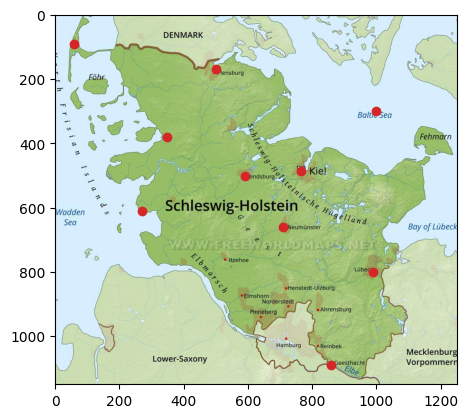

In [155]:
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread("sh_map.png")

staedte = np.array([
    [990,800], # Lübeck, 0
    [500,170], # Flensburg, 1
    [765,485], # Kiel, 2
    [710,660], # Neumünster, 3
    [860,1090], # Geesthacht, 4
    [590,500], # Rendsburg, 5
    [350,380], # Husum, 6
    [60,90], # Westerland, Sylt, 7
    [270,610], # Büsum, 8
    [1000,300], # Fehmarn, 9
])

distmat = np.sqrt(np.sum((staedte[None]-staedte[:,None])**2, axis=-1))
distmat /= distmat[0,1]
distmat *= 129.8 # Normiere Distanzen

def berechne_distanz(pfad):
    pfadlen = 0
    for i in range(len(pfad)):
        pfadlen += distmat[pfad[i%len(pfad)], pfad[(i+1)%len(pfad)]]
    return pfadlen

def male_karte(p=None):
    plt.figure()
    plt.imshow(img)
    if p is not None:
        for i in range(len(p)):
            s1 = staedte[p[i%len(p)]]
            s2 = staedte[p[(i+1)%len(p)]]
            plt.plot([s1[0],s2[0]], [s1[1],s2[1]], c="tab:blue", zorder=1)
        print("Pfadlänge:", round(berechne_distanz(p), ndigits=2),"km")
    plt.scatter(staedte[:,0], staedte[:,1], c="tab:red")
    plt.show()

male_karte()

### Die Aufgabe 🗺️📍

Santa startet an einem Ort, besucht **jeden anderen Ort genau einmal** und kehrt am Ende wieder zum Start zurück.

Dabei stellt sich die Frage:

> **In welcher Reihenfolge sollte Santa die Orte besuchen, damit die gesamte Strecke möglichst kurz ist?**

### Warum ist das schwierig? 🎁🔔

Schon bei wenigen Orten gibt es extrem viele mögliche Routen:

- Bei 3 Orten gibt es nur wenige Möglichkeiten.
- Bei 10 Orten gibt es **über 3 Millionen verschiedene Rundreisen**.

Es ist unmöglich, alle diese Wege von Hand zu vergleichen.  
Ein Computer kann das aber: indem er **alle Möglichkeiten ausprobiert**.

### Unser Ansatz: 🌟 Bruteforce 🌟

Wir lösen das Problem mit **Bruteforce**:

1. Wir erzeugen alle möglichen Reihenfolgen der Orte.
2. Wir berechnen für jede Reihenfolge die Gesamtlänge der Strecke (mit `berechne_distanz`).
3. Wir bestimmen die kürzeste Route.

Diese Art von Problem ist in der Informatik sehr bekannt und heißt eigentlich:

> **Travelling Salesman Problem (TSP)**

Für unseren Kurs nennen wir es passend zur Jahreszeit:

🎄 **Travelling Santa Problem** 🦌

Im nächsten Schritt setzen wir dieses Problem Schritt für Schritt in Python um.

#### Schritt 1: Alle Permutationen ✨🧮

Um den optimalen Weg für den Weihnachtsmann zu finden, müssen wir zuerst **alle möglichen Besuchsreihenfolgen** der Orte erzeugen.

Eine solche Reihenfolge nennt man in der Mathematik eine **Permutation**.

Beispiel:
Wenn Santa drei Orte besuchen muss:  
`[Lübeck, Kiel, Flensburg]`

Dann gibt es folgende mögliche Reihenfolgen:
- Lübeck → Kiel → Flensburg
- Lübeck → Flensburg → Kiel
- Kiel → Lübeck → Flensburg
- Kiel → Flensburg → Lübeck
- Flensburg → Lübeck → Kiel
- Flensburg → Kiel → Lübeck

Bei nur drei Orten sind das **6 Möglichkeiten**.  
Bei zehn Orten sind es schon **3 628 800** verschiedene Reihenfolgen.

### Idee des Algorithmus ☃️

Wir bauen die Permutationen **schrittweise** auf:

1. Starte mit einer leeren Liste.
2. Füge den ersten Ort an alle möglichen Positionen ein.
3. Füge den nächsten Ort wieder an alle möglichen Positionen ein.
4. Wiederhole das, bis alle Orte eingefügt wurden.

So entstehen systematisch **alle möglichen Reihenfolgen** – genau das, was wir für Bruteforce brauchen.


In [ ]:
def permutationen(liste):
    ergebnis = [[]]

    return ergebnis

alle_permutationen = permutationen(["Dustin", "Friederike", "Mika", "Gun Marit"])

print(*alle_permutationen, sep="\n")

#### Schritt 2 & 3: Streckenlänge berechnen und besten Weg finden 🛷📦

Jetzt bewerten wir alle möglichen Routen und wählen die beste aus.

### Idee 🎄🧠

- Der Weihnachtsmann startet **immer am selben Ort** (Index 0).
- Von dort aus besucht er alle anderen Orte genau einmal.
- Am Ende kehrt er wieder zum Start zurück.

Da der Startpunkt fest ist, müssen wir ihn **nicht mitpermutieren**.
Wir permutieren nur die übrigen Orte und hängen den Startpunkt vorne an.

👉 Das spart sehr viel Arbeit:
- Statt alle 10! Möglichkeiten zu prüfen,
- prüfen wir nur noch 9! Möglichkeiten  
  (das sind **90 % weniger Wege**).

### Warum dürfen wir den Startpunkt festhalten? 🎁📊

Wenn man einen Rundweg verschiebt, bleibt seine Länge gleich.

Beispiel:
- 0 → 2 → 5 → 3 → 0  
- 2 → 5 → 3 → 0 → 2  

Beide Wege sind gleich lang – sie beginnen nur an einer anderen Stelle.

Deshalb reicht es, **einen festen Startpunkt** zu wählen.
So vermeiden wir viele doppelte Rechnungen.


### Vorgehen ☃️

1. Setze die bisher kürzeste Strecke auf „unendlich“
2. Gehe alle Permutationen der übrigen Orte durch
3. Berechne die Länge der Route:
   - Start → alle Orte → zurück zum Start
4. Merke dir die kürzeste gefundene Route


In [ ]:
alle_permutationen = permutationen_iterativ(list(range(len(staedte))))

min_dist = float("inf")
minpfad = alle_permutationen[0]

print(minpfad)
male_karte(minpfad)